In [1]:
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
import pandas as pd

In [3]:
df_train = pd.read_csv('My Workplace/Dataset/churn-bigml-80.csv')
df_test = pd.read_csv('My Workplace/Dataset/churn-bigml-20.csv')

In [24]:
df_train

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,134.7,98,189.7,68,221.4,128,11.8,5,2,0
2662,192,415,0,1,156.2,77,215.5,126,279.1,83,9.9,6,2,0
2663,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
2664,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   int32  
 3   Voice mail plan         2666 non-null   int32  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total eve minutes       2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total night minutes     2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total intl minutes      2666 non-null   float64
 11  Total intl calls        2666 non-null   int64  
 12  Customer service calls  2666 non-null   int64  
 13  Churn                   2666 non-null   int64  
dtypes: float64(4), int32(2), int64(8)
memory

In [16]:
df_train.Churn.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

# Target column is unbalanced

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# Column Churn, International Plan, Voice Plan Encoding

In [10]:
df_train['Churn']=LE.fit_transform(df_train['Churn'])
df_train['International plan']=LE.fit_transform(df_train['International plan'])
df_train['Voice mail plan']=LE.fit_transform(df_train['Voice mail plan'])

In [17]:
df_train.drop(columns = ['State'],inplace = True)

<AxesSubplot:>

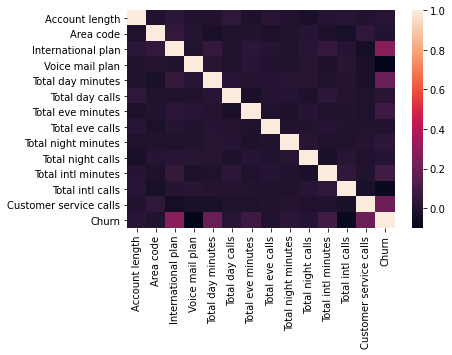

In [26]:
sns.heatmap(df_train.corr())

In [23]:
df_train.drop(columns = ['Total day charge','Total eve charge','Total night charge','Total intl charge','Number vmail messages'],inplace = True)

In [28]:
from sklearn.utils import resample
zero = df_train[df_train['Churn']==0]
one = df_train[df_train['Churn']==1]

In [30]:
upsample = resample(one,
                   n_samples = len(zero))

In [31]:
df_final = pd.concat([upsample,zero])

In [33]:
df_final.Churn.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

In [37]:
X_train=df_final.drop(columns=['Churn'])
Y_train=df_final.Churn

In [38]:
from sklearn.svm import SVC
SVCM=SVC()
model = SVCM.fit(X_train,Y_train)

In [42]:
df_test

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,137.1,88,155.7,125,247.6,94,11.5,7,2,0
663,106,408,0,1,83.6,131,203.9,131,229.5,73,8.1,3,1,0
664,60,415,0,0,193.9,118,85.0,110,210.1,134,13.2,8,3,0
665,159,415,0,0,169.8,114,197.7,105,193.7,82,11.6,4,1,0


In [40]:
df_test['Churn']=LE.fit_transform(df_test['Churn'])
df_test['International plan']=LE.fit_transform(df_test['International plan'])
df_test['Voice mail plan']=LE.fit_transform(df_test['Voice mail plan'])

In [41]:
df_test.drop(columns = ['Total day charge','Total eve charge','Total night charge','Total intl charge','Number vmail messages','State'],inplace = True)

In [43]:
X_test=df_test.drop(columns=['Churn'])
Y_test=df_test.Churn

In [44]:
y_pred=model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test, y_pred)

0.8440779610194903

<AxesSubplot:>

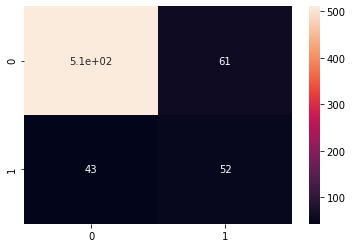

In [47]:
cf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

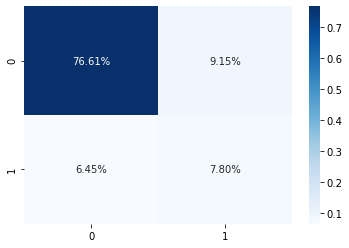

In [48]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [49]:
import pickle
pickle.dump(model, open('model1.sav', 'wb'))